In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
grid = pd.read_pickle("outputs_in_instab_strip.pkl")


l_values = [0, 1, 2] 
l_columns = {l: [col for col in grid.columns if col.endswith(f"_l_{l}")] for l in l_values}

X_frequencies = np.hstack([grid[l_columns[l]].values for l in l_values])  
delta_nu_values = grid["delta_nu"].values[:, np.newaxis]
print(min(delta_nu_values), max(delta_nu_values))
mod_frequencies = X_frequencies % delta_nu_values 

X = np.stack((X_frequencies, mod_frequencies), axis=-1)
y = np.hstack([np.full_like(grid[l_columns[l]].values, l) for l in l_values])  

print(f"X-matrix shape: {X.shape}")
print(f"y-matrix shape: {y.shape}") 

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)  

X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

size = X_train.shape[0]
inpt = X_train[:size]
print(inpt.shape)

[1.60375] [8.3909]
X-matrix shape: (153314, 30, 2)
y-matrix shape: (153314, 30)
Train: torch.Size([122651, 30, 2]), Validation: torch.Size([15331, 30, 2]), Test: torch.Size([15332, 30, 2])
torch.Size([122651, 30, 2])


In [2]:
import pickle
import numpy as np

# Load the saved fake frequencies
with open("fake_data_test_fmeanpstorefake.pkl", "rb") as f:
    fake_data_test = pickle.load(f)

# Example: print the first train model fake frequencies
for key in list(fake_data_test.keys())[:5]:  # just first 5 models
    print(f"{key} fake frequencies:")
    print(np.round(fake_data_test[key][:,0], 4))  # [:,0] is the frequency column


train_model_0 fake frequencies:
[15.0316 37.8882 16.5117 37.6716 36.7766 27.8114]
train_model_1 fake frequencies:
[63.7316 60.7013 34.2684 26.5228 79.9016 85.1795]
train_model_2 fake frequencies:
[38.4875 21.2667 53.3079 48.1314 51.8896 32.7242]
train_model_3 fake frequencies:
[81.4298 58.8809 50.7046 70.5398 57.6572 46.5023]
train_model_4 fake frequencies:
[23.7456 29.7917 34.2725 50.7163 53.7353 19.3035]


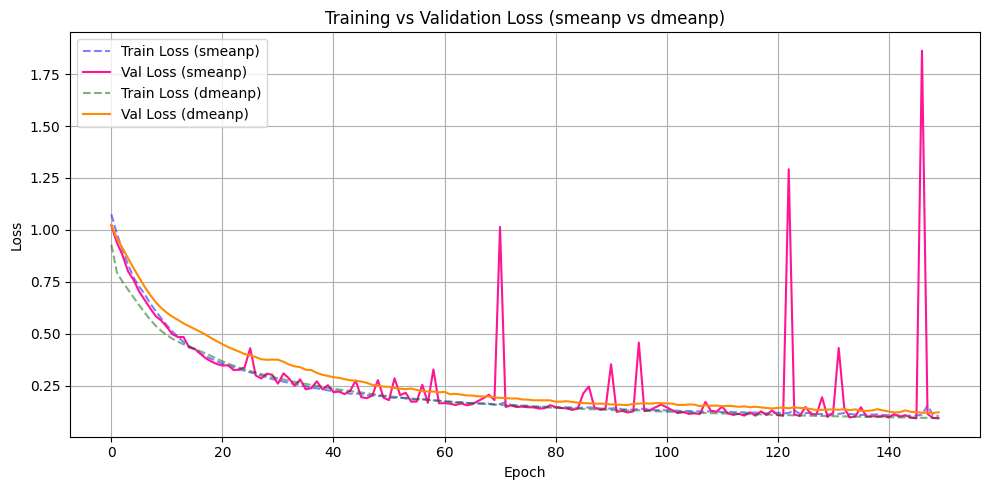

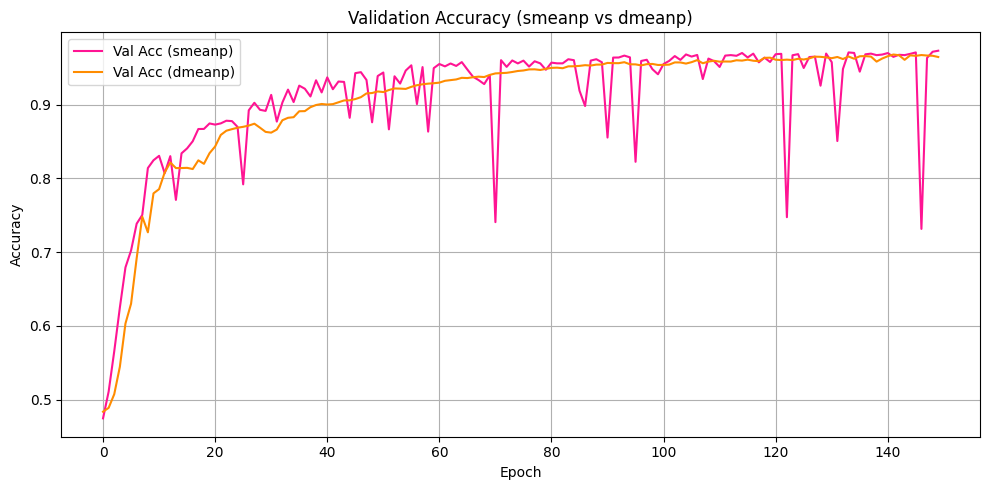

Final Test Accuracy (smeanp): 0.9721714931733194
Final Test Accuracy (dmeanp): 0.9639381685363945
Final Test Loss (smeanp): 0.09393559396266937
Final Test Loss (dmeanp): 0.12273562699556351


In [3]:
import pickle
import matplotlib.pyplot as plt

def load_pickle(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

train_loss_smeanp = load_pickle("train_history_smeanp.pkl")
test_loss_smeanp  = load_pickle("val_history_smeanp.pkl")
train_loss_dmeanp = load_pickle("train_history_dmeanp.pkl")
test_loss_dmeanp  = load_pickle("val_history_dmeanp.pkl")

train_acc_smeanp = load_pickle("train_history_smeanp.pkl")  # no separate train_acc file in your runs
test_acc_smeanp  = load_pickle("val_acc_history_smeanp.pkl")
train_acc_dmeanp = load_pickle("train_history_dmeanp.pkl")  # same note here
test_acc_dmeanp  = load_pickle("val_acc_history_dmeanp.pkl")

test_accuracy_smeanp  = load_pickle("test_accuracy_smeanp.pkl")
test_accuracy_dmeanp = load_pickle("test_accuracy_dmeanp.pkl")

plt.figure(figsize=(10, 5))
plt.plot(train_loss_smeanp, label="Train Loss (smeanp)", color="blue", linestyle="--", alpha=0.5)
plt.plot(test_loss_smeanp,  label="Val Loss (smeanp)", color="deeppink")
plt.plot(train_loss_dmeanp, label="Train Loss (dmeanp)", color="darkgreen", linestyle="--", alpha=0.5)
plt.plot(test_loss_dmeanp,  label="Val Loss (dmeanp)", color="darkorange")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (smeanp vs dmeanp)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curves_meanp.png", dpi=150)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(test_acc_smeanp,  label="Val Acc (smeanp)", color="deeppink")
plt.plot(test_acc_dmeanp,  label="Val Acc (dmeanp)", color="darkorange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy (smeanp vs dmeanp)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("accuracy_curves_meanp.png", dpi=300)
plt.show()

print("Final Test Accuracy (smeanp):", test_accuracy_smeanp)
print("Final Test Accuracy (dmeanp):", test_accuracy_dmeanp)
print("Final Test Loss (smeanp):", test_loss_smeanp[-1])
print("Final Test Loss (dmeanp):", test_loss_dmeanp[-1])

Random Smeanp model index: 13096
Random Dmeanp model index: 3338


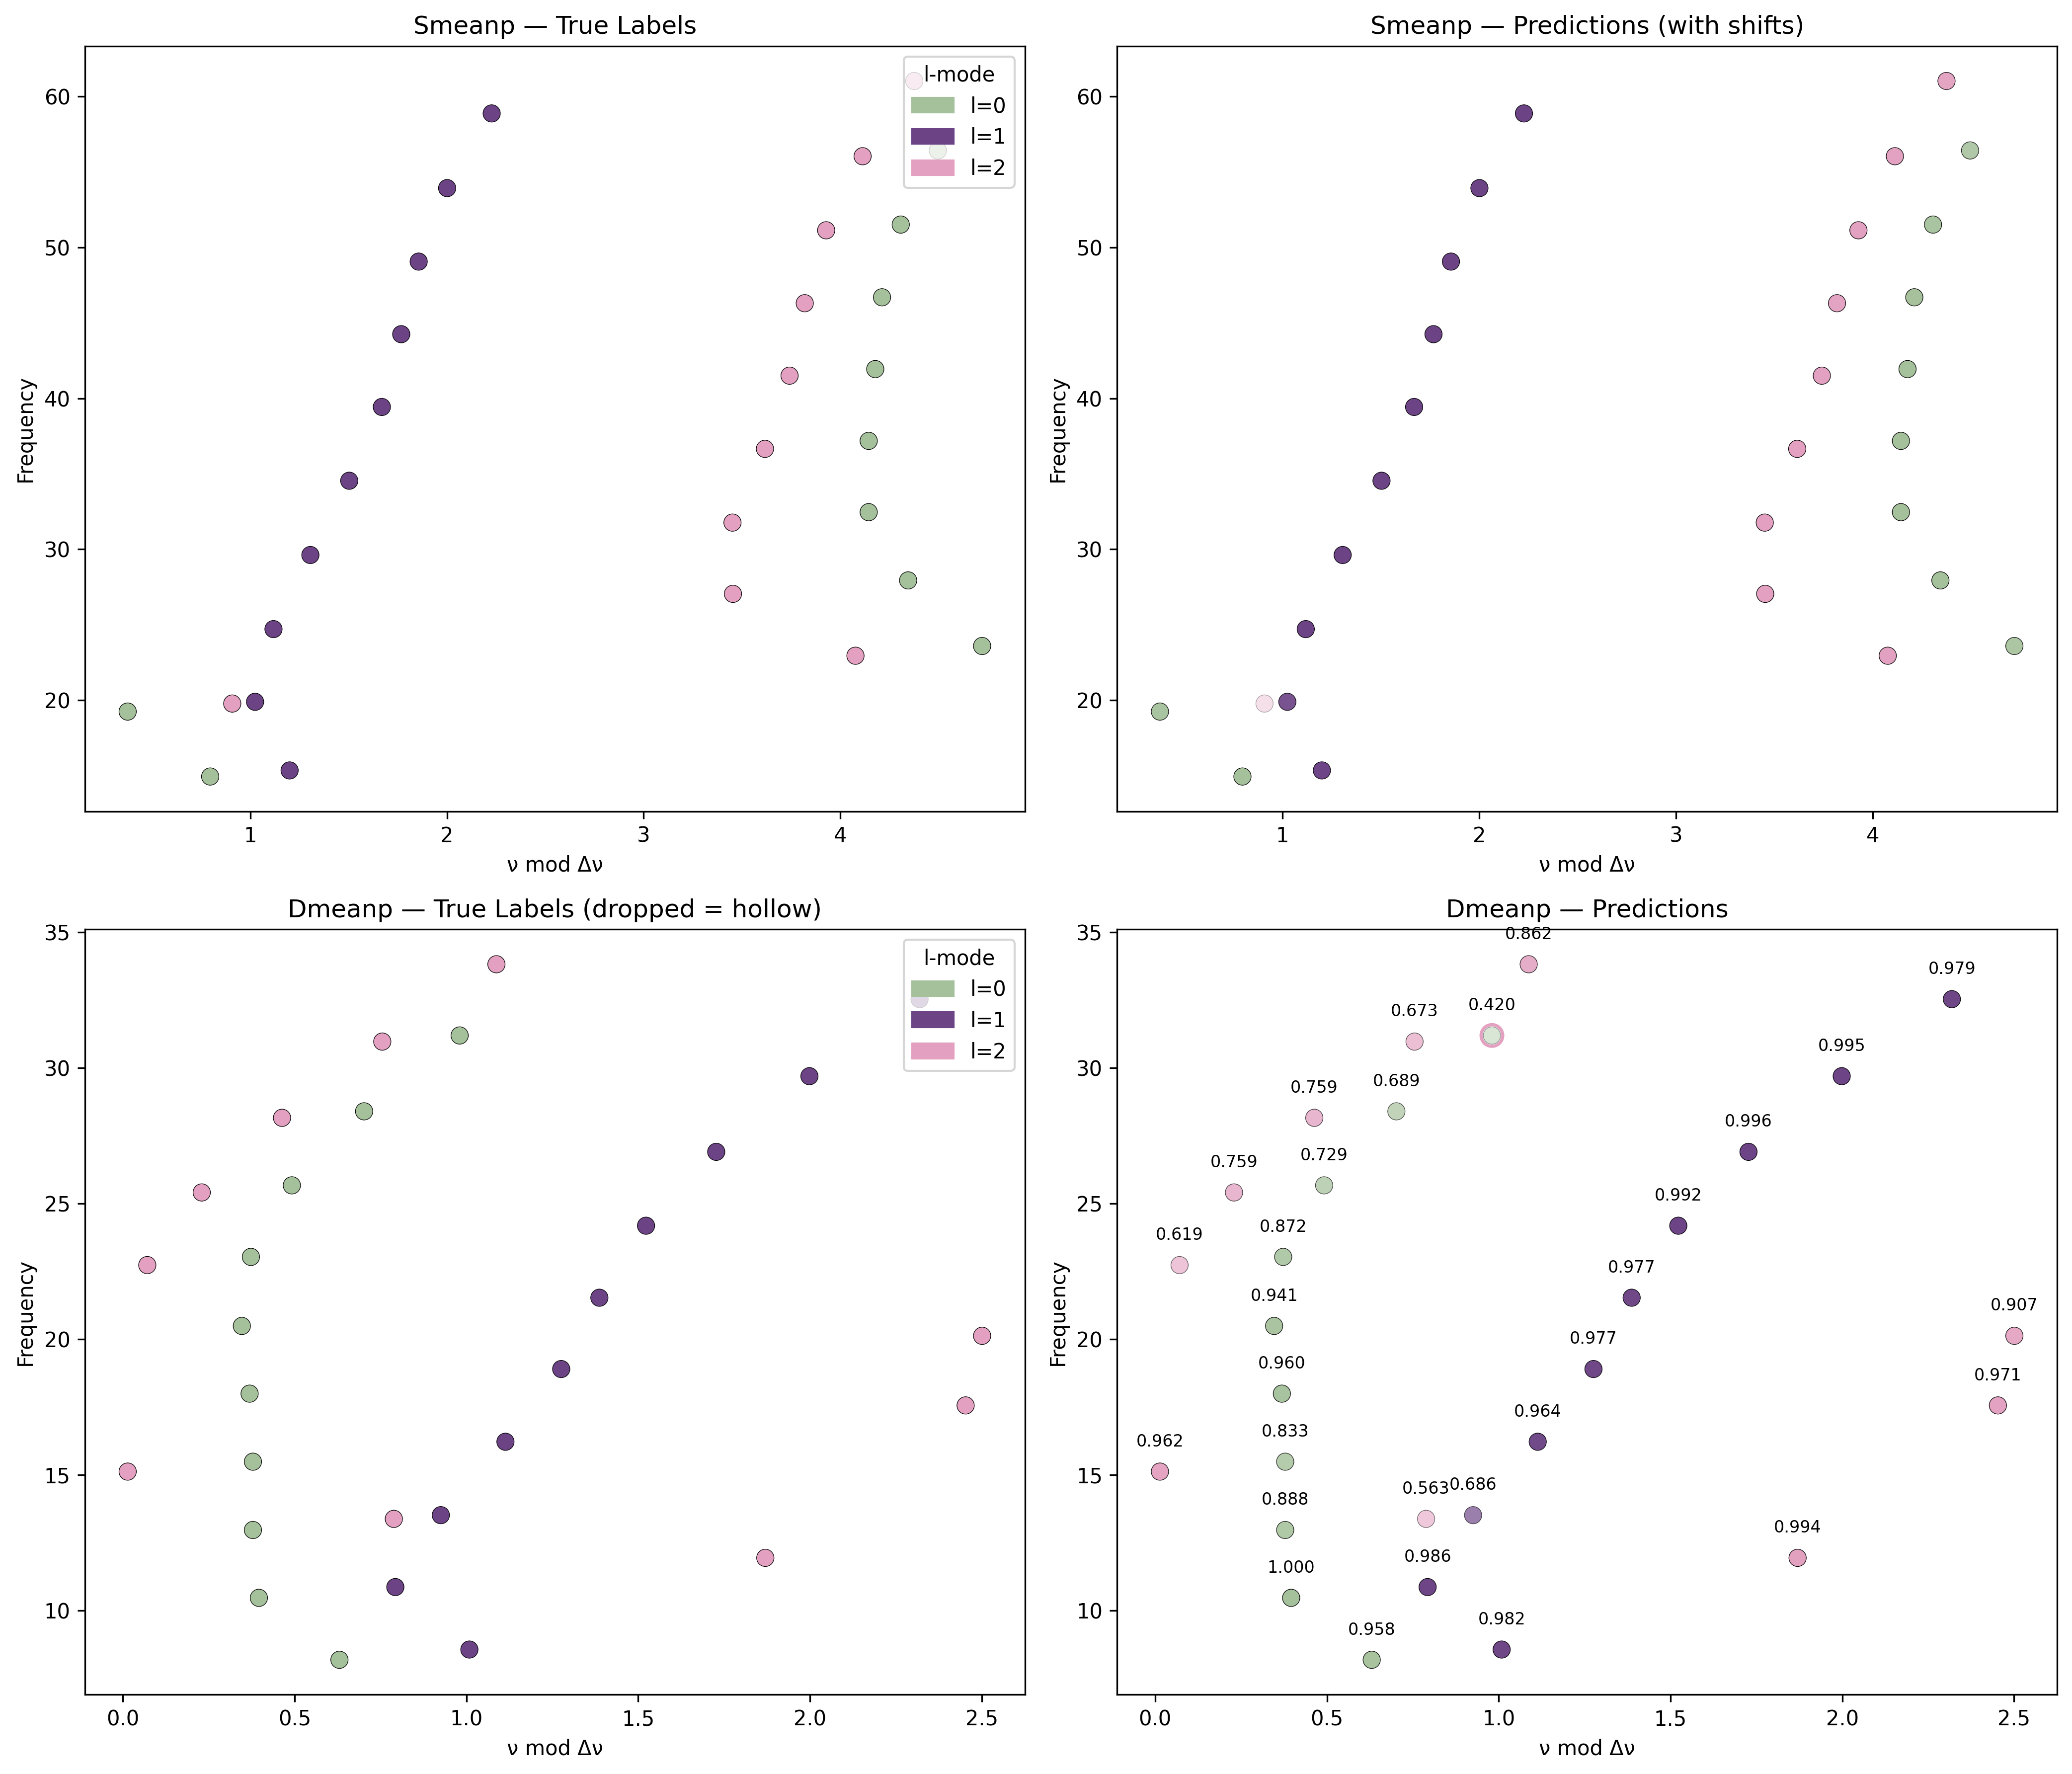

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import pickle

# -----------------------------
# Config
# -----------------------------
REAL_CLASSES = [0,1,2]
color_map = {0:'#a5c19b', 1:'#6c4385', 2:'#e3a0c0'}
marker_size = 70

# -----------------------------
# Load outputs
# -----------------------------
with open("output_logits_smeanp.pkl","rb") as f: output_smeanp = pickle.load(f)
with open("test_targets_smeanp.pkl","rb") as y: y_test_smeanp = pickle.load(y)
with open("X_test_smeanp.pkl","rb") as f: X_test_smeanp = pickle.load(f)

with open("output_logits_dmeanp.pkl","rb") as f: output_dmeanp = pickle.load(f)
with open("test_targets_dmeanp.pkl","rb") as y: y_test_dmeanp = pickle.load(y)
with open("X_test_dmeanp.pkl","rb") as f: X_test_dmeanp = pickle.load(f)

# -----------------------------
# Random model selection
# -----------------------------
s_idx = random.randint(0,len(output_smeanp)-1)
d_idx = random.randint(0,len(output_dmeanp)-1)
print(f"Random Smeanp model index: {s_idx}")
print(f"Random Dmeanp model index: {d_idx}")

# -----------------------------
# Prepare function
# -----------------------------
def prepare_plot_data(output_logits, y_test, X_test, model_idx):
    logits = output_logits[model_idx]
    labels = y_test[model_idx]
    freqs = X_test[model_idx,:,0]
    mod_freqs = X_test[model_idx,:,1]

    if logits.shape[0] != labels.shape[0]:
        logits = logits.T

    valid_mask = labels != -1
    freqs_valid = freqs[valid_mask]
    mod_valid = mod_freqs[valid_mask]
    labels_valid = labels[valid_mask]
    logits_valid = logits[valid_mask]

    # Probabilities
    logits_valid -= np.max(logits_valid, axis=1, keepdims=True)
    probs = np.exp(logits_valid)
    probs /= probs.sum(axis=1, keepdims=True)
    preds = np.argmax(probs, axis=1)

    colors_true = [color_map[l] for l in labels_valid]
    edge_colors_pred = [color_map.get(p,'black') for p in preds]

    probs_true_label = np.array([probs[i,l] for i,l in enumerate(labels_valid)])
    wrong_mask = preds != labels_valid

    return {
        "freqs": freqs_valid,
        "mod": mod_valid,
        "labels": labels_valid,
        "preds": preds,
        "probs_true": probs_true_label,
        "colors": colors_true,
        "edges": edge_colors_pred,
        "wrong_mask": wrong_mask,
        "valid_mask": valid_mask
    }

# -----------------------------
# Prepare data
# -----------------------------
sdata = prepare_plot_data(output_smeanp, y_test_smeanp, X_test_smeanp, s_idx)
ddata = prepare_plot_data(output_dmeanp, y_test_dmeanp, X_test_dmeanp, d_idx)

# -----------------------------
# Handle Smeanp shifts safely
# -----------------------------
try:
    with open(f"shake_smeanp_model_{s_idx}.pkl","rb") as f:
        shake_entry = pickle.load(f)
    shake_arr = np.array(shake_entry["shake_amount"])
    shake_arr_valid = shake_arr[sdata["valid_mask"]]
    s_shifted = (sdata["freqs"] + shake_arr_valid[:,0],
                 sdata["mod"] + shake_arr_valid[:,1])
except FileNotFoundError:
    s_shifted = None

# -----------------------------
# Handle Dmeanp dropped points
# -----------------------------
d_dropped = ddata["labels"] == -1

# -----------------------------
# Plotting
# -----------------------------
fig, axs = plt.subplots(2,2,figsize=(14,12),dpi=300)

# --- Top row: Smeanp ---
# Left: true labels
axs[0,0].scatter(sdata["mod"], sdata["freqs"], c=sdata["colors"], edgecolors='black',
                 linewidths=0.3, s=marker_size)
axs[0,0].set_title("Smeanp — True Labels")
axs[0,0].set_xlabel("ν mod Δν")
axs[0,0].set_ylabel("Frequency")

# Right: predictions + shifts + probabilities
axs[0,1].scatter(sdata["mod"], sdata["freqs"], c=sdata["colors"],
                 alpha=np.clip(sdata["probs_true"],0.3,1.0),
                 edgecolors='black', linewidths=0.3, s=marker_size)
if s_shifted is not None:
    axs[0,1].scatter(sdata["mod"], sdata["freqs"], facecolors='none', edgecolors='red',
                     linewidths=1.5, s=marker_size+40)
    for x0,y0,x1,y1 in zip(sdata["mod"], sdata["freqs"], s_shifted[1], s_shifted[0]):
        axs[0,1].plot([x0,x1],[y0,y1], 'r--', lw=0.8)
    axs[0,1].scatter(s_shifted[1], s_shifted[0], c=sdata["colors"],
                     alpha=np.clip(sdata["probs_true"],0.3,1.0),
                     edgecolors='black', linewidths=0.5, s=marker_size)
    # annotate probabilities above points
    for xi, yi, pi in zip(s_shifted[1], s_shifted[0], np.round(sdata["probs_true"],3)):
        axs[0,1].text(xi, yi+0.8, f"{pi:.3f}", fontsize=8, ha='center', va='bottom', color='black')

axs[0,1].set_title("Smeanp — Predictions (with shifts)")
axs[0,1].set_xlabel("ν mod Δν")
axs[0,1].set_ylabel("Frequency")

# --- Bottom row: Dmeanp ---
axs[1,0].scatter(ddata["mod"][~d_dropped], ddata["freqs"][~d_dropped], c=np.array(ddata["colors"])[~d_dropped],
                 edgecolors='black', linewidths=0.3, s=marker_size)
axs[1,0].scatter(ddata["mod"][d_dropped], ddata["freqs"][d_dropped], facecolors='none',
                 edgecolors='black', linewidths=1.5, s=marker_size+40)
axs[1,0].set_title("Dmeanp — True Labels (dropped = hollow)")
axs[1,0].set_xlabel("ν mod Δν")
axs[1,0].set_ylabel("Frequency")

# Right: predictions (without dropped points) + probabilities
axs[1,1].scatter(ddata["mod"][~d_dropped], ddata["freqs"][~d_dropped], c=np.array(ddata["colors"])[~d_dropped],
                 alpha=np.clip(ddata["probs_true"][~d_dropped],0.3,1.0),
                 edgecolors='black', linewidths=0.3, s=marker_size)
wrong = ddata["wrong_mask"] & (~d_dropped)
axs[1,1].scatter(ddata["mod"][wrong], ddata["freqs"][wrong], facecolors='none',
                 edgecolors=np.array(ddata["edges"])[wrong], linewidths=1.5, s=marker_size+40)
# annotate probabilities
for xi, yi, pi in zip(ddata["mod"][~d_dropped], ddata["freqs"][~d_dropped],
                      np.round(ddata["probs_true"][~d_dropped],3)):
    axs[1,1].text(xi, yi+0.8, f"{pi:.3f}", fontsize=8, ha='center', va='bottom', color='black')

axs[1,1].set_title("Dmeanp — Predictions")
axs[1,1].set_xlabel("ν mod Δν")
axs[1,1].set_ylabel("Frequency")

# -----------------------------
# Legend (only angular degrees)
# -----------------------------
legend_elements = [
    mpatches.Patch(color=color_map[0], label='l=0'),
    mpatches.Patch(color=color_map[1], label='l=1'),
    mpatches.Patch(color=color_map[2], label='l=2')
]
axs[0,0].legend(handles=legend_elements, title="l-mode", loc="upper right")
axs[1,0].legend(handles=legend_elements, title="l-mode", loc="upper right")

plt.tight_layout()
plt.show()

## Now trying the mode identification
# HD 139614

https://arxiv.org/pdf/2011.11821

In [5]:
import numpy as np
frequencies = np.array([
    21.36513, 27.95328, 34.77609, 41.53747, 48.37933, 55.25743, 61.97086,
    16.87165, 32.55347, 38.40601, 58.46084, 28.24243, 27.01307, 20.59936,
    18.54655, 18.69868, 19.17648, 19.50970, 19.80056, 20.72404, 22.15081,
    22.25558, 22.79990, 23.13894, 23.30843, 24.46210, 24.72073, 26.67124,
    27.57177, 29.12013, 29.28361, 29.80605, 30.27912, 32.31897, 58.50036
])
dnu = np.mean(np.diff(np.sort(frequencies)))
print(dnu)

1.3264473529411767


In [6]:
frequencies = np.array([
    21.36513, 27.95328, 34.77609, 41.53747, 48.37933, 55.25743, 61.97086,
    26.73244, 32.55347, 38.40601, 58.46084
])
dnu = np.mean(np.diff(np.sort(frequencies)))
print(dnu)

4.060573


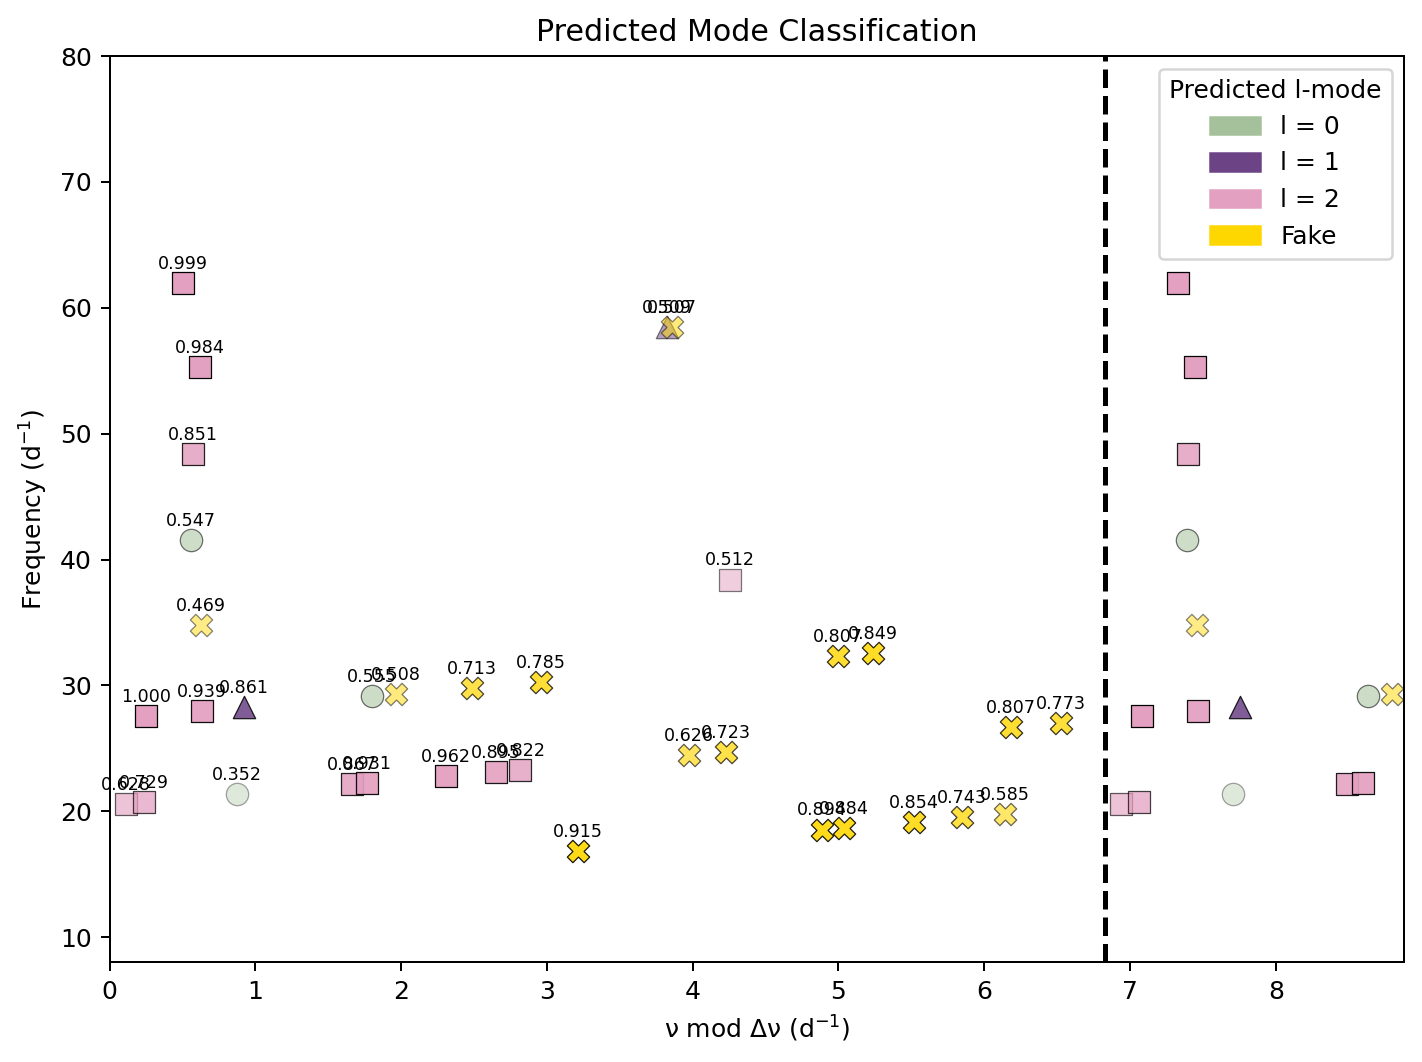

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Frequencies to identify (Hz/d)
frequencies = np.array([
    21.36513, 27.95328, 34.77609, 41.53747, 48.37933, 55.25743, 61.97086,
    16.87165, 32.55347, 38.40601, 58.46084, 28.24243, 27.01307, 20.59936,
    18.54655, 18.69868, 19.17648, 19.50970, 19.80056, 20.72404, 22.15081,
    22.25558, 22.79990, 23.13894, 23.30843, 24.46210, 24.72073, 26.67124,
    27.57177, 29.12013, 29.28361, 29.80605, 30.27912, 32.31897, 58.50036
])

# Large separation (Δν)
delta_nu = 6.83

# Compute ν mod Δν and prepare input
nu_mod_delta_nu = np.mod(frequencies, delta_nu)
X_hd = torch.tensor(
    np.stack([frequencies, nu_mod_delta_nu], axis=1),
    dtype=torch.float32
).unsqueeze(0)  # Shape [1, N_points, 2]

# Model definition (must match training)
class PointNet(nn.Module):
    def __init__(self, num_classes=4, point_dimension=2, aggregator="mean"):
        super(PointNet, self).__init__()

        a = 3
        nfeat = 64 
        self.conv_1_a = nn.Conv1d(1, nfeat, kernel_size=a, padding=2)
        self.conv_1_b = nn.Conv1d(1, nfeat, kernel_size=a, padding=2)
        self.conv_2 = nn.Conv1d(nfeat, nfeat, kernel_size=a, padding=2)
        self.bn_1 = nn.BatchNorm1d(nfeat)
        self.bn_2 = nn.BatchNorm1d(nfeat)

        # aggregator type: "max" or "mean"
        self.aggregator = aggregator

    def forward(self, x, plot=False):
        batch_size, num_points, _ = x.shape
        x_freq = x[:, :, 0].unsqueeze(1)
        x_modnu = x[:, :, 1].unsqueeze(1)
        x_freq = F.pad(x_freq, (1, 1), mode='replicate')
        x_modnu = F.pad(x_modnu, (1, 1), mode='circular')
        x_freq_feat = self.conv_1_a(x_freq)
        x_modnu_feat = self.conv_1_b(x_modnu)
        x = x_freq_feat + x_modnu_feat
        x = F.relu(self.bn_1(x))
        x = F.relu(self.bn_2(self.conv_2(x)))

        if self.aggregator == "max":
            x = F.max_pool1d(x, kernel_size=num_points)
        elif self.aggregator == "mean":
            x = F.avg_pool1d(x, kernel_size=num_points)
        else:
            raise ValueError(f"Unknown aggregator type: {self.aggregator}")

        x = x.view(batch_size, -1)
        return x

class SegmentationPointNet(nn.Module):
    def __init__(self, num_classes=4, point_dimension=2, aggregator="mean"):
        super(SegmentationPointNet, self).__init__()
        self.base_pointnet = PointNet(
            num_classes=num_classes, point_dimension=point_dimension, aggregator=aggregator)
        nhidden = 64
        nfeat = 64 
        self.fc_1 = nn.Linear(nfeat + 2, nhidden)
        self.fc_2 = nn.Linear(nhidden, num_classes)

    def forward(self, x):
        global_features = self.base_pointnet(x)
        global_features = global_features.unsqueeze(1).repeat(1, x.shape[1], 1)
        x = torch.cat((x, global_features), dim=2)
        x = F.relu(self.fc_1(x))
        return F.log_softmax(self.fc_2(x), dim=2)   

# Load trained weights
#model_path = "segmentation_pointnet_fmeanpstorefake.pth" 
model_path = "segmentation_pointnet_dsfmeanpstorefake.pth" 
model = SegmentationPointNet()
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval()

# Predict
with torch.no_grad():
    logits_hd = model(X_hd)           # Shape [1, N_points, 4]
    probs_hd = torch.exp(logits_hd)[0].numpy()
    preds_hd = np.argmax(probs_hd, axis=1)

color_map = {0: '#a5c19b', 1: '#6c4385', 2: '#e3a0c0', 3: 'gold'}
colors_pred = [color_map[int(p)] for p in preds_hd]
legend_elements = [
    mpatches.Patch(color=color_map[0], label="l = 0"),
    mpatches.Patch(color=color_map[1], label="l = 1"),
    mpatches.Patch(color=color_map[2], label="l = 2"),
    mpatches.Patch(color=color_map[3], label="Fake"),]

# Marker shapes for each l-value
marker_shapes = {0: "o", 1: "^", 2: "s", 3: "X"}  # circle, triangle, square, X

fig, ax = plt.subplots(figsize=(8, 6), dpi=180)

for i, freq in enumerate(frequencies):
    l_val = preds_hd[i]
    prob = probs_hd[i, l_val]
    marker = marker_shapes[l_val]
    color = color_map[l_val]

    # Plot the two symmetric copies
    ax.scatter(nu_mod_delta_nu[i], freq,
               c=color, marker=marker, edgecolors="black", s=80,
               linewidths=0.5, alpha=prob)
    ax.scatter(nu_mod_delta_nu[i] + delta_nu, freq,
               c=color, marker=marker, edgecolors="black", s=80,
               linewidths=0.5, alpha=prob)

    # Annotate with probability to 3 decimals
    ax.text(nu_mod_delta_nu[i], freq + 0.8, f"{prob:.3f}",
            fontsize=7, ha="center", va="bottom", color="black")

# Add Δν reference line
ax.axvline(delta_nu, color="black", linestyle="--", linewidth=2)

# Axis formatting
ax.set_xlim(0, delta_nu * 1.3)
ax.set_ylim(8, 80)
ax.set_xlabel("ν mod Δν (d$^{-1}$)")
ax.set_ylabel("Frequency (d$^{-1}$)")
ax.set_title("Predicted Mode Classification", fontsize=12)

# Legend
ax.legend(handles=legend_elements, title="Predicted l-mode", loc="upper right")

plt.tight_layout()
plt.show()

# HD 261711 
https://ui.adsabs.harvard.edu/abs/2013A%26A...552A..68Z/abstract

[1 2 2 2 3 3 3 2]
point 0: class=1, prob=0.956
point 1: class=2, prob=1.000
point 2: class=2, prob=1.000
point 3: class=2, prob=0.888
point 4: class=3, prob=1.000
point 5: class=3, prob=1.000
point 6: class=3, prob=1.000
point 7: class=2, prob=1.000


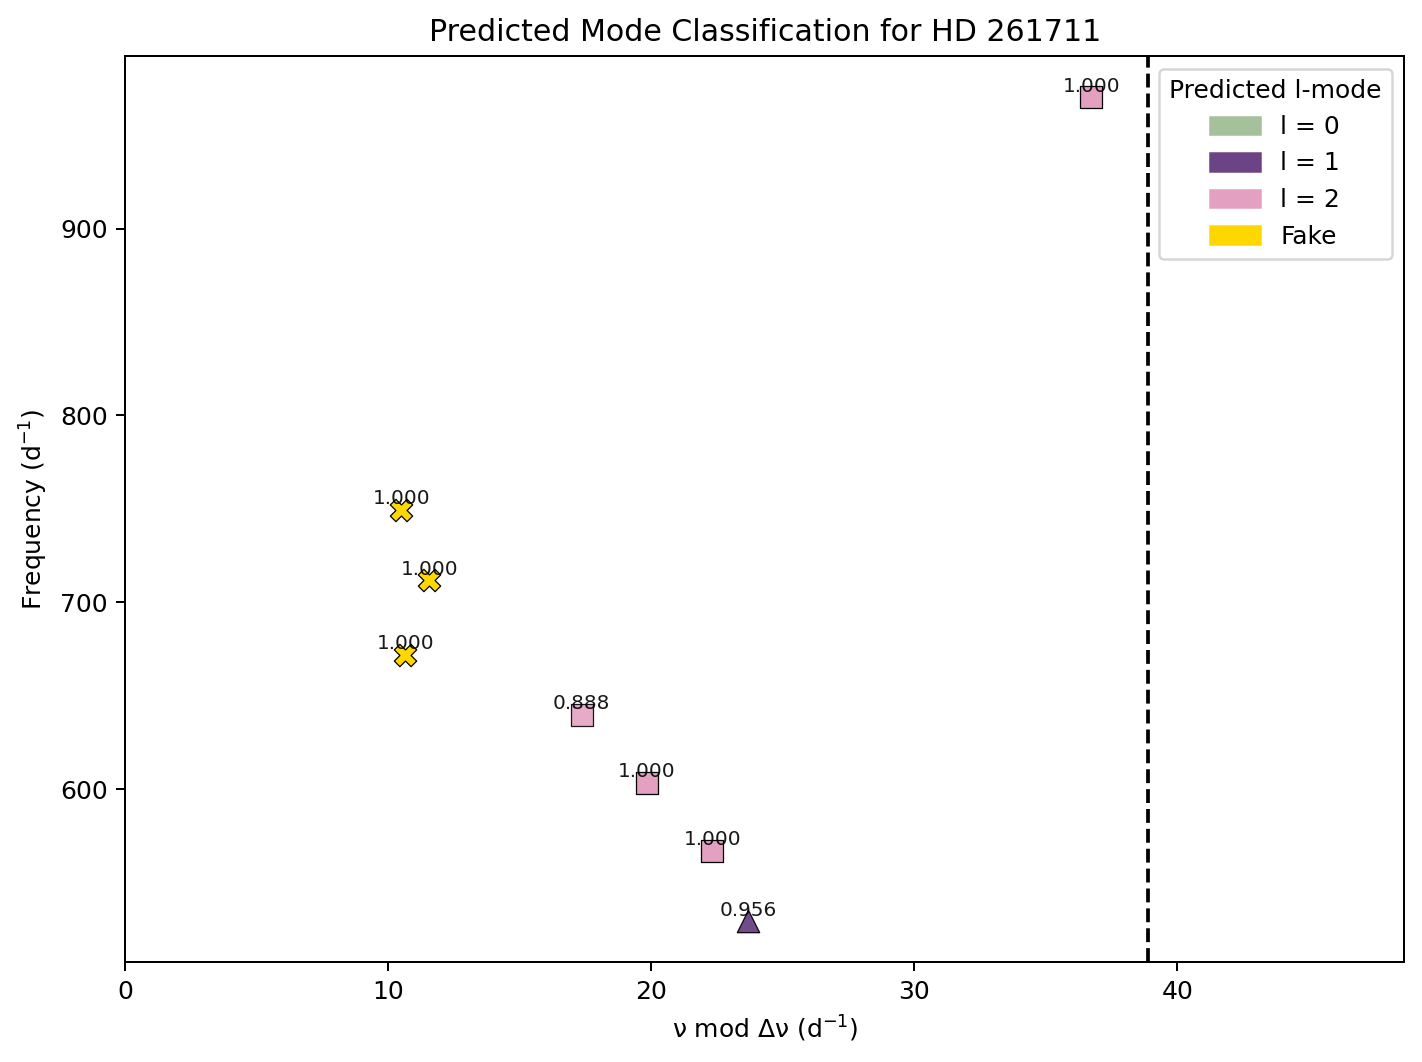

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
'''
frequencies = 11.574074*np.array([
    61.4976, 58.0272,61.4401,58.5821,58.0553,55.4566,55.0608,58.429,48.982,55.366,51.217,54.742,53.131,61.281,52.057,52.374,55.891,58.231,
    54.808,45.739,61.463,64.764,83.84,61.34,57.971
])
'''
# now only weighted frequencies used 
frequencies = np.array([529.39,566.92,603.33,639.75,671.94,711.76,749.59,970.34])

delta_nu = 38.9 # µHz
nu_mod_delta_nu = np.mod(frequencies, delta_nu)
#print(nu_mod_delta_nu)

X_hd = torch.tensor(np.stack([frequencies, nu_mod_delta_nu], axis=1), dtype=torch.float32).unsqueeze(0)

class PointNet(torch.nn.Module):
    def __init__(self, num_classes=3, point_dimension=2, dropout=0.3):
        super(PointNet, self).__init__()
        a = 3
        nfeat = 64
        self.conv_1_a = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_1_b = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_2 = torch.nn.Conv1d(nfeat, nfeat, kernel_size=a)
        self.bn_1 = torch.nn.BatchNorm1d(nfeat)
        self.bn_2 = torch.nn.BatchNorm1d(nfeat)
    def forward(self, x):
        batch_size, num_points, _ = x.shape
        x_freq = x[:, :, 0].unsqueeze(1)
        x_modnu = x[:, :, 1].unsqueeze(1)
        x_freq = torch.nn.functional.pad(x_freq, (1, 1), mode='replicate')
        x_modnu = torch.nn.functional.pad(x_modnu, (1, 1), mode='circular')
        x = self.conv_1_a(x_freq) + self.conv_1_b(x_modnu)
        x = torch.nn.functional.relu(self.bn_1(x))
        x = torch.nn.functional.relu(self.bn_2(self.conv_2(x)))
        x = torch.nn.functional.max_pool1d(x, kernel_size=x.size(-1))
        return x.view(batch_size, -1)
class SegmentationPointNet(torch.nn.Module):
    def __init__(self, num_classes=3, point_dimension=2, dropout=0.3):
        super(SegmentationPointNet, self).__init__()
        self.base_pointnet = PointNet(point_dimension=point_dimension)
        nfeat = 64
        nhidden = 64
        self.fc_1 = torch.nn.Linear(nfeat + 2, nhidden)
        self.fc_2 = torch.nn.Linear(nhidden, num_classes)
    def forward(self, x):
        global_feat = self.base_pointnet(x).unsqueeze(1).repeat(1, x.shape[1], 1)
        x = torch.cat([x, global_feat], dim=2)
        x = torch.nn.functional.relu(self.fc_1(x))
        return torch.nn.functional.log_softmax(self.fc_2(x), dim=2)

#model_path = "segmentation_pointnet_fmeanpstorefake.pth" 
model_path = "segmentation_pointnet_dsfmeanpstorefake.pth" 
model = SegmentationPointNet(num_classes=4)
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

# Run prediction
with torch.no_grad():
    logits_hd = model(X_hd)
    #print(logits_hd)
    probs_hd = torch.exp(logits_hd)[0].numpy()
    #print(probs_hd)
    preds_hd = np.argmax(probs_hd, axis=1)
    print(preds_hd)
    
# Define colors and markers for all 4 classes
color_map = {0: '#a5c19b', 1: '#6c4385', 2: '#e3a0c0', 3: 'gold'}
marker_shapes = {0: 'o', 1: '^', 2: 's', 3: 'X'}  # X for 4th class
legend_elements = [
    mpatches.Patch(color=color_map[0], label='l = 0'),
    mpatches.Patch(color=color_map[1], label='l = 1'),
    mpatches.Patch(color=color_map[2], label='l = 2'),
    mpatches.Patch(color=color_map[3], label='Fake'),
]

marker_size = 80
fig, ax = plt.subplots(figsize=(8, 6), dpi=180)

for i in range(len(frequencies)):
    l_val = preds_hd[i]
    prob = probs_hd[i, l_val]  # probability of predicted class
    print(f"point {i}: class={l_val}, prob={prob:.3f}")

    marker = marker_shapes[l_val]
    color = color_map[l_val]
    alpha = prob
    x = nu_mod_delta_nu[i]
    y = frequencies[i]

    ax.scatter(x, y, c=color, marker=marker, edgecolors='black', s=marker_size, linewidths=0.5, alpha=alpha)
    ax.scatter(x + delta_nu, y, c=color, marker=marker, edgecolors='black', s=marker_size, linewidths=0.5, alpha=alpha)
    ax.text(x, y + 0.8, f"{prob:.3f}", fontsize=8, ha='center', va='bottom', color='black', alpha=0.9)

# Axes formatting
ax.axvline(delta_nu, color='black', linestyle='--', linewidth=1.5)
ax.set_xlim(0, delta_nu * 1.25)
ax.set_xlabel("ν mod Δν (d$^{-1}$)")
ax.set_ylabel("Frequency (d$^{-1}$)")
ax.set_title("Predicted Mode Classification for HD 261711")
ax.legend(handles=legend_elements, title="Predicted l-mode", loc="upper right")

plt.tight_layout()
plt.show()

# HD 34282
https://ui.adsabs.harvard.edu/abs/2013MNRAS.428.2596C/abstract

Predicted classes: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0]
Point 0: class=2, prob=1.000
Point 1: class=2, prob=1.000
Point 2: class=2, prob=1.000
Point 3: class=2, prob=1.000
Point 4: class=2, prob=1.000
Point 5: class=2, prob=1.000
Point 6: class=2, prob=1.000
Point 7: class=2, prob=1.000
Point 8: class=2, prob=1.000
Point 9: class=2, prob=1.000
Point 10: class=2, prob=1.000
Point 11: class=2, prob=1.000
Point 12: class=2, prob=1.000
Point 13: class=2, prob=1.000
Point 14: class=2, prob=1.000
Point 15: class=0, prob=1.000
Point 16: class=2, prob=1.000
Point 17: class=2, prob=1.000
Point 18: class=2, prob=1.000
Point 19: class=2, prob=1.000
Point 20: class=2, prob=1.000
Point 21: class=0, prob=1.000


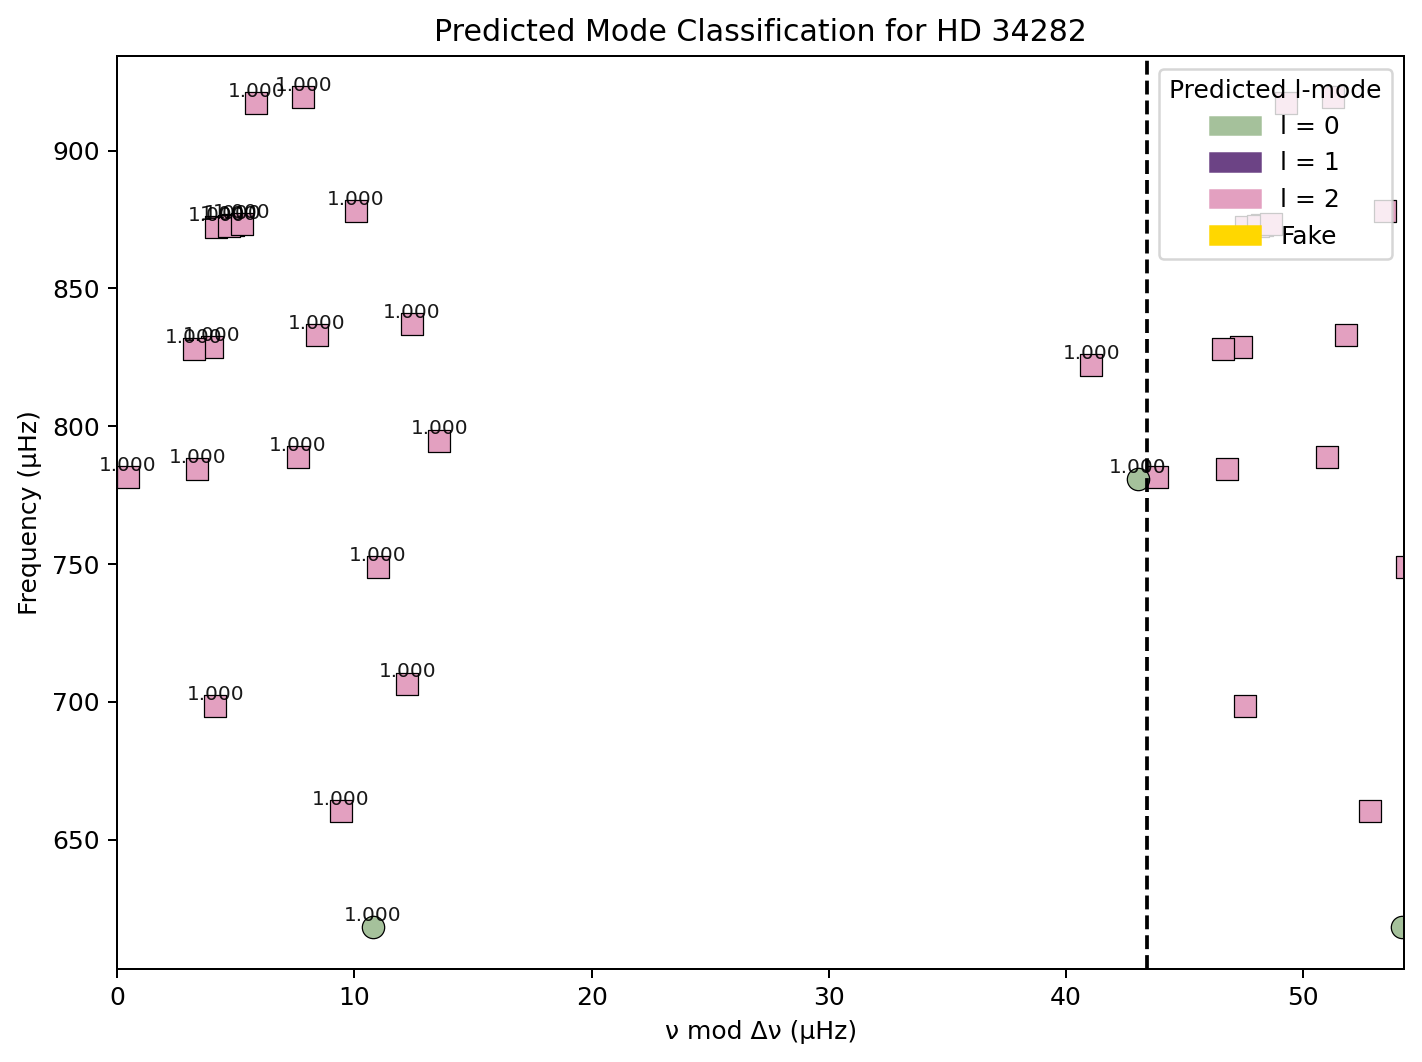

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -----------------------
# Frequencies and Δν
# -----------------------
frequencies = np.array([
    919.24, 917.27, 872.87, 878.05, 872.18, 828.58, 827.84, 660.42,
    833.01, 788.80, 748.79, 706.63, 784.58, 822.26, 872.70, 618.37,
    781.65, 873.24, 794.78, 837.03, 698.53, 780.84
])  # µHz

delta_nu = 43.4  # µHz
nu_mod_delta_nu = np.mod(frequencies, delta_nu)

# Prepare input tensor [1, N_points, 2]
X_hd = torch.tensor(np.stack([frequencies, nu_mod_delta_nu], axis=1), dtype=torch.float32).unsqueeze(0)

# -----------------------
# Model definition
# -----------------------
class PointNet(torch.nn.Module):
    def __init__(self, nfeat=64):
        super(PointNet, self).__init__()
        a = 3
        self.conv_1_a = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_1_b = torch.nn.Conv1d(1, nfeat, kernel_size=a, padding=1)
        self.conv_2 = torch.nn.Conv1d(nfeat, nfeat, kernel_size=a)
        self.bn_1 = torch.nn.BatchNorm1d(nfeat)
        self.bn_2 = torch.nn.BatchNorm1d(nfeat)

    def forward(self, x):
        batch_size, num_points, _ = x.shape
        x_freq = x[:, :, 0].unsqueeze(1)
        x_modnu = x[:, :, 1].unsqueeze(1)

        x_freq = torch.nn.functional.pad(x_freq, (1, 1), mode='replicate')
        x_modnu = torch.nn.functional.pad(x_modnu, (1, 1), mode='circular')

        x = self.conv_1_a(x_freq) + self.conv_1_b(x_modnu)
        x = torch.nn.functional.relu(self.bn_1(x))
        x = torch.nn.functional.relu(self.bn_2(self.conv_2(x)))
        x = torch.nn.functional.max_pool1d(x, kernel_size=x.size(-1))
        return x.view(batch_size, -1)

class SegmentationPointNet(torch.nn.Module):
    def __init__(self, num_classes=4):
        super(SegmentationPointNet, self).__init__()
        nfeat = 64
        nhidden = 64
        self.base_pointnet = PointNet(nfeat=nfeat)
        self.fc_1 = torch.nn.Linear(nfeat + 2, nhidden)
        self.fc_2 = torch.nn.Linear(nhidden, num_classes)

    def forward(self, x):
        global_feat = self.base_pointnet(x).unsqueeze(1).repeat(1, x.shape[1], 1)
        x = torch.cat([x, global_feat], dim=2)
        x = torch.nn.functional.relu(self.fc_1(x))
        return torch.nn.functional.log_softmax(self.fc_2(x), dim=2)

# -----------------------
# Load checkpoint
# -----------------------
model_path = "segmentation_pointnet_dsfmeanpstorefake.pth"
model = SegmentationPointNet(num_classes=4)
model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.eval()

# -----------------------
# Run prediction
# -----------------------
with torch.no_grad():
    logits_hd = model(X_hd)              # [1, N_points, 4]
    probs_hd = torch.exp(logits_hd)[0].numpy()  # [N_points, 4]
    preds_hd = np.argmax(probs_hd, axis=1)
    print("Predicted classes:", preds_hd)

# -----------------------
# Plotting
# -----------------------
color_map = {0: '#a5c19b', 1: '#6c4385', 2: '#e3a0c0', 3: 'gold'}
marker_shapes = {0: 'o', 1: '^', 2: 's', 3: 'X'}
legend_elements = [
    mpatches.Patch(color=color_map[0], label='l = 0'),
    mpatches.Patch(color=color_map[1], label='l = 1'),
    mpatches.Patch(color=color_map[2], label='l = 2'),
    mpatches.Patch(color=color_map[3], label='Fake'),
]

fig, ax = plt.subplots(figsize=(8, 6), dpi=180)
marker_size = 80

for i in range(len(frequencies)):
    l_val = preds_hd[i]
    prob = probs_hd[i, l_val]  # predicted probability
    print(f"Point {i}: class={l_val}, prob={prob:.3f}")

    x = nu_mod_delta_nu[i]
    y = frequencies[i]
    marker = marker_shapes[l_val]
    color = color_map[l_val]
    alpha = prob

    ax.scatter(x, y, c=color, marker=marker, edgecolors='black', s=marker_size, linewidths=0.5, alpha=alpha)
    ax.scatter(x + delta_nu, y, c=color, marker=marker, edgecolors='black', s=marker_size, linewidths=0.5, alpha=alpha)
    ax.text(x, y + 0.8, f"{prob:.3f}", fontsize=8, ha='center', va='bottom', color='black', alpha=0.9)

# Axes formatting
ax.axvline(delta_nu, color='black', linestyle='--', linewidth=1.5)
ax.set_xlim(0, delta_nu * 1.25)
ax.set_xlabel("ν mod Δν (µHz)")
ax.set_ylabel("Frequency (µHz)")
ax.set_title("Predicted Mode Classification for HD 34282")
ax.legend(handles=legend_elements, title="Predicted l-mode", loc="upper right")
plt.tight_layout()
plt.show()

## Confusion matrix

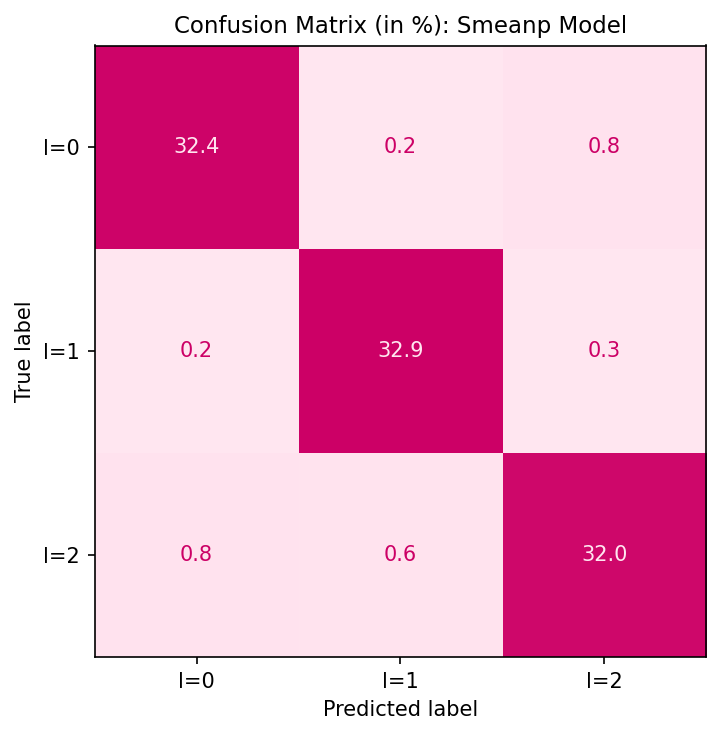

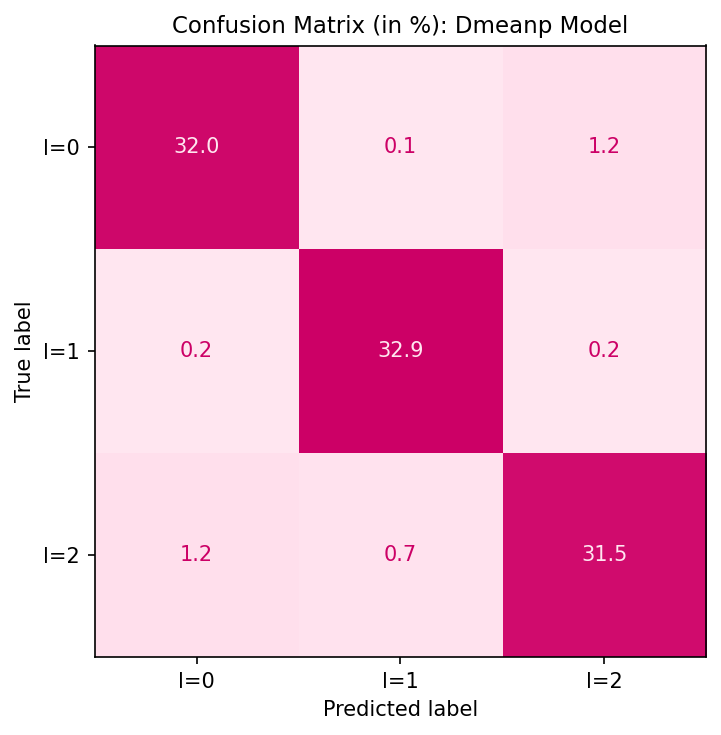

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load files (consistent with your current training script names)
with open("test_predictions_smeanp.pkl", "rb") as f:
    pred_labels_s = pickle.load(f)   # already integers, shape [B, N]
with open("test_targets_smeanp.pkl", "rb") as f:
    true_labels_s = pickle.load(f)   # integers, shape [B, N]

with open("test_predictions_dmeanp.pkl", "rb") as f:
    pred_labels_d = pickle.load(f)
with open("test_targets_dmeanp.pkl", "rb") as f:
    true_labels_d = pickle.load(f)

def plot_confusion(pred_labels, true_labels, title, filename):
    pred_labels = np.array(pred_labels)
    true_labels = np.array(true_labels)

    # Flatten for sklearn
    true_flat = true_labels.flatten()
    pred_flat = pred_labels.flatten()

    # Classes: only 0, 1, 2
    classes = [0, 1, 2]
    class_names = ["l=0", "l=1", "l=2"]

    # Compute confusion matrix (raw counts)
    cm = confusion_matrix(true_flat, pred_flat, labels=classes)

    # Convert to percentage of total
    cm_percent = cm / cm.sum() * 100

    # Custom pink colormap
    pink_cmap = LinearSegmentedColormap.from_list(
        "custom_pink", ["#ffe6f0", "#ff80bf", "#cc0066"]
    )

    # Plot
    fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent,
                                  display_labels=class_names)
    disp.plot(ax=ax, cmap=pink_cmap, colorbar=False, values_format=".1f")
    plt.title(title, fontsize=11)
    plt.savefig(filename, bbox_inches="tight", pad_inches=0.3, transparent=True, dpi=300)
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion(pred_labels_s, true_labels_s,
               "Confusion Matrix (in %): Smeanp Model",
               "confusionmatrix_smeanp.jpg")

plot_confusion(pred_labels_d, true_labels_d,
               "Confusion Matrix (in %): Dmeanp Model",
               "confusionmatrix_dmeanp.jpg")

## Pie chart!!1!

It works now because we trimmed the target array to match the exact shape of the predictions, so the element-wise comparison no longer fails. Before, the arrays had different lengths (extra points in test_targets), which caused the broadcasting error during the equality check.

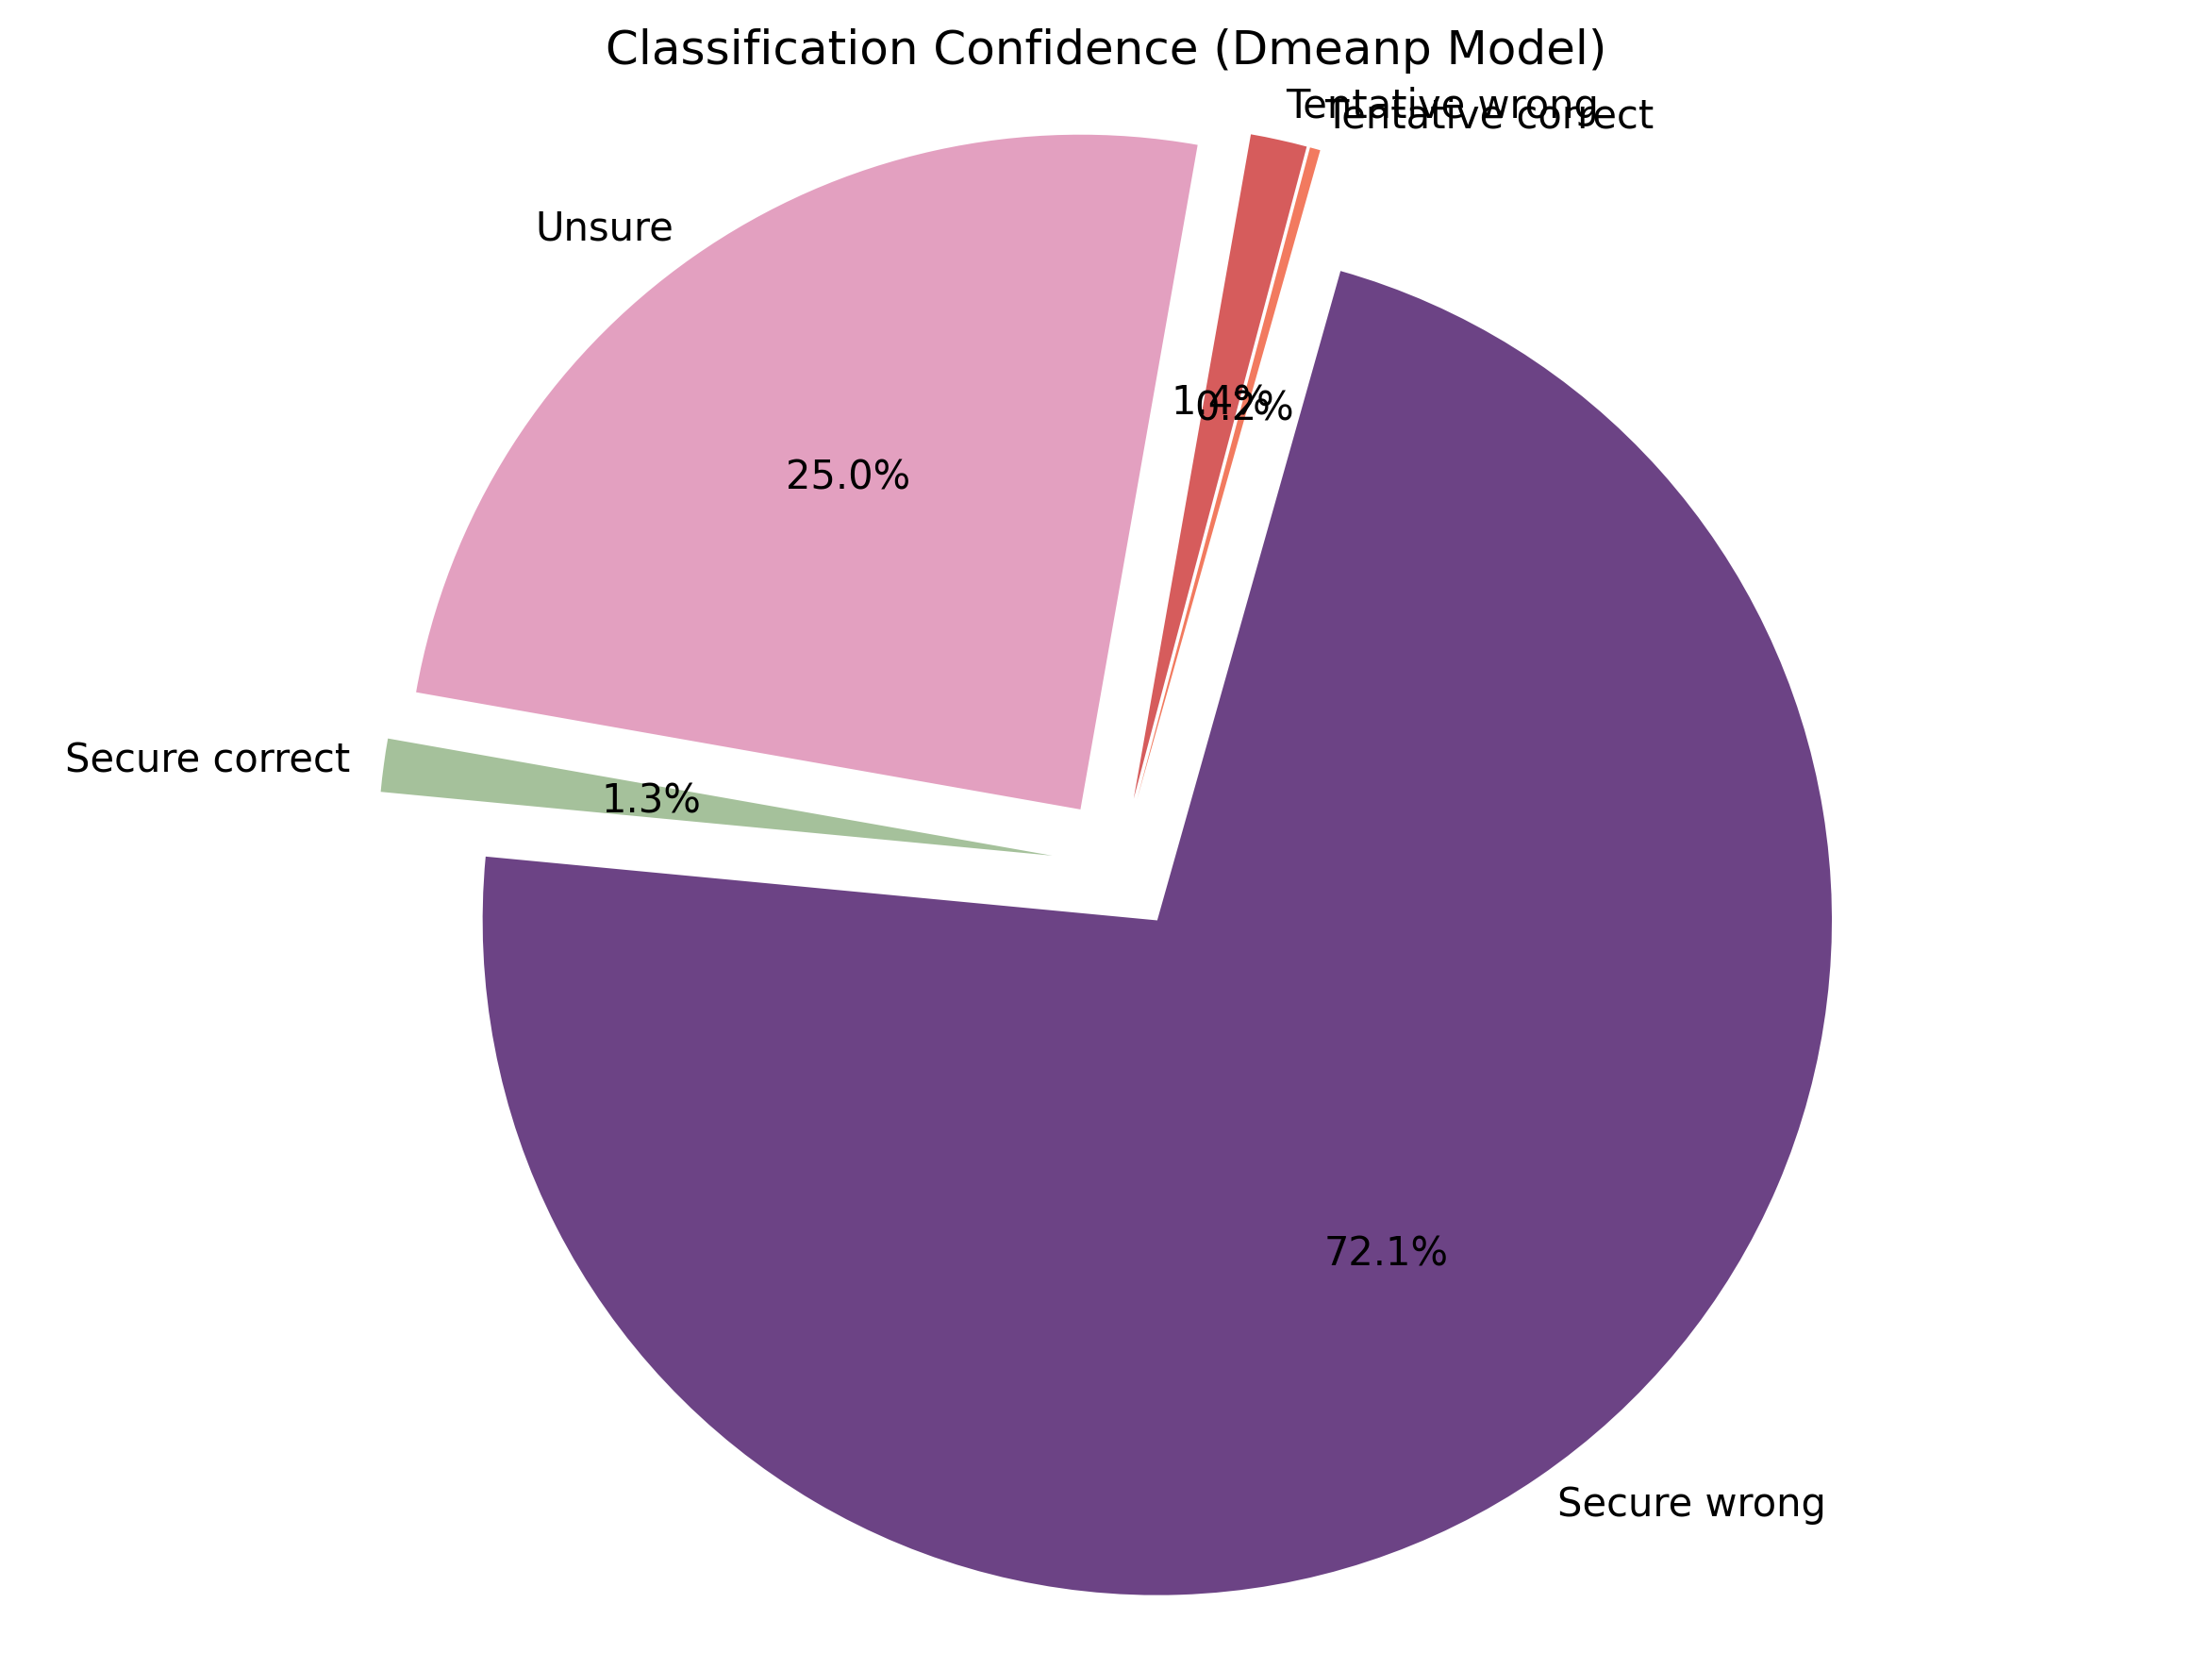

In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# --- Select model: uncomment one ---
# Model = smeanp
# with open("output_logits_smeanp.pkl", "rb") as f:
#     test_out = pickle.load(f)
# with open("test_targets_smeanp.pkl", "rb") as f:
#     test_targets = pickle.load(f)
# title_str = "Smeanp Model"
# save_filename = "classification_confidence_smeanp.jpg"

# Model = dmeanp
with open("output_logits_dmeanp.pkl", "rb") as f:
    test_out = pickle.load(f)
with open("test_targets_dmeanp.pkl", "rb") as f:
    test_targets = pickle.load(f)
title_str = "Dmeanp Model"
save_filename = "classification_confidence_dmeanp.jpg"

# Convert to numpy arrays
probs = np.exp(test_out)               # [batch, num_points, num_classes]
predicted_classes = np.argmax(probs, axis=2)
predicted_probs = np.max(probs, axis=2)

# Align targets to prediction dimensions
targets_trimmed = test_targets[:, :predicted_classes.shape[1]]

y_true_flat = targets_trimmed.flatten()
y_pred_flat = predicted_classes.flatten()
p_l_flat = predicted_probs.flatten()

# Confidence masks
secure_mask = p_l_flat >= 0.95
tentative_mask = (p_l_flat >= 0.68) & (p_l_flat < 0.95)
unsure_mask = p_l_flat < 0.68
correct_mask = y_pred_flat == y_true_flat

# Counts
secure_correct = np.sum(secure_mask & correct_mask)
secure_wrong = np.sum(secure_mask & ~correct_mask)
tentative_correct = np.sum(tentative_mask & correct_mask)
tentative_wrong = np.sum(tentative_mask & ~correct_mask)
unsure_total = np.sum(unsure_mask)

# Plot
labels = ["Secure correct", "Secure wrong", "Tentative correct", "Tentative wrong", "Unsure"]
sizes = [secure_correct, secure_wrong, tentative_correct, tentative_wrong, unsure_total]
colors = ['#a5c19b', '#6c4385', '#f27a5f', '#d65c5c', '#e3a0c0']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

plt.figure(figsize=(8, 6), dpi=300)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=170, explode=explode, labeldistance=1.05)
plt.title(f"Classification Confidence ({title_str})")
plt.axis('equal')
plt.tight_layout()
plt.savefig(save_filename, bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()
